Perceptron Model Accuracy: 83.33%


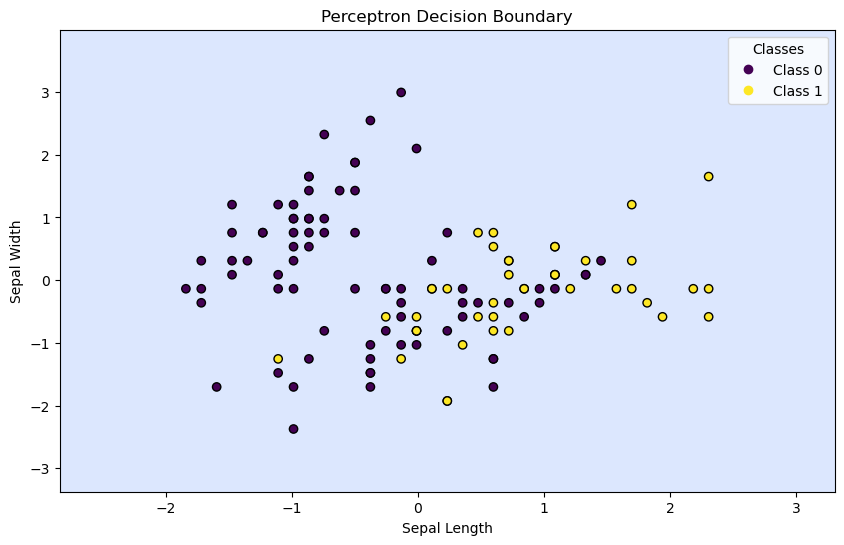

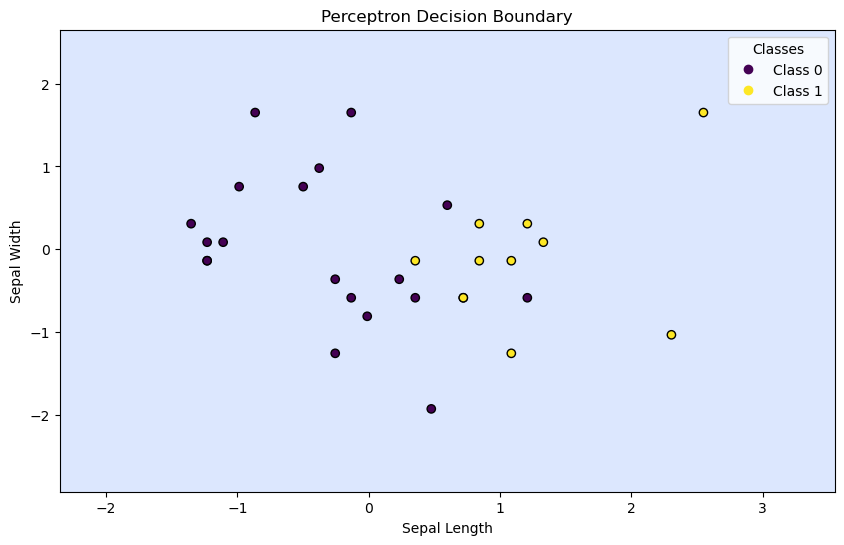

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only sepal length and sepal width
y = iris.target

# Convert to binary classification (Setosa and Versicolor as class 0, Virginica as class 1)
y = np.where(y == 2, 1, 0)

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Perceptron model
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions
y_pred = perceptron.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {accuracy * 100:.2f}%')

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, scaler):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Standardize the mesh grid using the same scaler
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    Z = model.predict(grid_scaled)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Changed to 'coolwarm' for better color distinction
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='viridis')  # Changed to 'viridis' for distinct colors
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Perceptron Decision Boundary')
    
    # Add legend
    handles, labels = scatter.legend_elements()
    plt.legend(handles, ['Class 0', 'Class 1'], title="Classes")

    plt.show()

# Visualizing the decision boundary using the training data
plot_decision_boundary(X_train, y_train, perceptron, scaler)

# Optional: Visualizing the decision boundary using the testing data
plot_decision_boundary(X_test, y_test, perceptron, scaler)
